In [1]:
import datetime
import matplotlib.pyplot as plt
import multiprocessing
import os
import pandas as pd

In [2]:
from gendis.genetic import GeneticExtractor

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
error_df = pd.read_csv('data/gunpoint_processed_error.csv')

In [4]:
error_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,truth,clf_pred,clf_prob,error
0,-1.054014,-1.050717,-1.047666,-1.047448,-1.048769,-1.047781,-1.047891,-1.047536,-1.047369,-1.044656,...,-1.071325,-1.068112,-1.068966,-1.069154,-1.066642,-1.064798,1,1,0.920254,0.079746
1,-0.966288,-0.971525,-0.971881,-0.972672,-0.966935,-0.966532,-0.967584,-0.966147,-0.966501,-0.966086,...,-1.009584,-1.011476,-1.010935,-1.008073,-1.009745,-1.006283,1,1,0.927635,0.072365
2,-0.693911,-0.690750,-0.683657,-0.676097,-0.675943,-0.674141,-0.671976,-0.670974,-0.670276,-0.670103,...,-0.591039,-0.590049,-0.588937,-0.586893,-0.586506,-0.589174,2,2,0.095378,0.095378


In [5]:
X_train = error_df.drop(columns=['truth', 'clf_pred', 'clf_prob', 'error'])
y_train = error_df['error']

In [6]:
y_train.describe()

count    66.000000
mean      0.244938
std       0.194964
min       0.000008
25%       0.104760
50%       0.195218
75%       0.367542
max       0.734978
Name: error, dtype: float64

In [7]:
help(GeneticExtractor)

Help on class GeneticExtractor in module gendis.genetic:

class GeneticExtractor(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Feature selection with genetic algorithm.
 |  
 |  Parameters
 |  ----------
 |  population_size : int
 |      The number of individuals in our population. Increasing this parameter
 |      increases both the runtime per generation, as the probability of
 |      finding a good solution.
 |  
 |  iterations : int
 |      The maximum number of generations the algorithm may run.
 |  
 |  wait : int
 |      If no improvement has been found for `wait` iterations, then stop
 |  
 |  add_noise_prob : float
 |      The chance that gaussian noise is added to a random shapelet from a
 |      random individual every generation
 |  
 |  add_shapelet_prob : float
 |      The chance that a shapelet is added to a random shapelet set every gen
 |  
 |  remove_shapelet_prob : float
 |      The chance that a shapelet is deleted to a random shap set every gen
 | 

In [8]:
from gendis.fitness import DistributionDistance

fitness_func = DistributionDistance(
    distance_function=DistributionDistance.simple_mean, 
    shapelet_dist_threshold=1.0
)

args = {
    "fitness": fitness_func,
    "population_size": 100, 
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3,
    "max_shaps": 3,
    "wait": 20, 
    "max_len": 30,
    "n_jobs": multiprocessing.cpu_count() - 1,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [9]:
gendis.__dict__

{'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 15,
 'n_jobs': 15,
 'normed': False,
 '_min_length': 0,
 'max_len': 30,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len, max_len)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len, max_len, n_draw=None)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, toolbox)>,
  <function gendis.operators.mask_shapelet(shapelets, toolbox)>],
 'fitness': <gendis.fitness.DistributionDistance at 0x7f6c6a06d240>,
 'label_mapping': {},
 'shapelets': []}

In [10]:
y_train

0     0.079746
1     0.072365
2     0.095378
3     0.734978
4     0.066358
        ...   
61    0.224323
62    0.434576
63    0.365658
64    0.368170
65    0.120600
Name: error, Length: 66, dtype: float64

In [11]:
%%time
gendis.fit(X_train, y_train.to_numpy())

it		avg		std		max		time
1		0.0296		0.042		0.13403	1.061
2		0.0449		0.045		0.13403	1.5378
3		0.0595		0.053		0.13403	1.139
4		0.0697		0.048		0.13403	1.0906
5		0.0884		0.042		0.13403	0.9264
6		0.1039		0.035		0.13403	0.8356
7		0.1172		0.026		0.13403	0.7841
8		0.1265		0.011		0.13403	0.7612
9		0.1326		0.014		0.176438	0.812
10		0.133		0.019		0.176438	0.856
11		0.1363		0.018		0.189932	0.8011
12		0.143		0.027		0.189932	0.9495
13		0.1349		0.034		0.189932	0.8059
14		0.1345		0.038		0.189932	1.0258
15		0.1438		0.03		0.189932	1.1889
16		0.1482		0.038		0.198093	0.865
17		0.1335		0.046		0.198093	1.3094
18		0.136		0.039		0.198093	2.4855
19		0.1255		0.031		0.198093	1.1684
20		0.1289		0.023		0.198093	1.3295
21		0.1371		0.024		0.198093	0.8889
22		0.132		0.022		0.198093	0.93
23		0.1324		0.027		0.198093	1.6799
24		0.1387		0.025		0.198093	1.7309
25		0.1357		0.029		0.198093	1.1917
26		0.1357		0.029		0.198093	1.1225
27		0.1337		0.029		0.198093	2.1506
28		0.1369		0.031		0.198093	1.117
29		0.1308		0.032		0.19809

In [28]:
ts = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
folder = f'./results/gunpoint/{ts}/'
os.makedirs(folder)
gendis.save(f'{folder}/gendis.pickle')

In [16]:
%%time
distances_train = gendis.transform(X_train)

CPU times: user 105 ms, sys: 94 µs, total: 105 ms
Wall time: 104 ms


In [17]:
distances_train

array([[1.41482067, 1.488536  ],
       [1.25049698, 1.82079363],
       [0.05032361, 1.74625087],
       [0.12316065, 2.37532997],
       [0.54137671, 1.95462799],
       [1.2712487 , 1.79906034],
       [0.11148886, 1.75845289],
       [0.0818801 , 1.72482288],
       [1.74904788, 1.35377872],
       [1.53729653, 1.61516261],
       [1.45372546, 1.73825169],
       [0.00737518, 1.61144459],
       [1.57788122, 0.86172479],
       [0.02309763, 2.31500316],
       [0.12134244, 2.19036508],
       [2.77125907, 1.76862419],
       [0.52466488, 1.98482871],
       [1.81753004, 1.13201845],
       [0.03904588, 1.94733608],
       [1.17921627, 1.86715567],
       [0.04687212, 2.0207715 ],
       [0.07292295, 2.0357554 ],
       [0.14841963, 1.75670159],
       [0.19719286, 1.76312971],
       [0.21528164, 2.00218463],
       [1.82263637, 0.4572562 ],
       [2.56343055, 1.15191126],
       [2.36134267, 0.66752684],
       [0.50715458, 1.58927071],
       [1.92012799, 0.48846933],
       [0.

In [18]:
gendis.shapelets

[array([1.97489031, 1.97548398, 1.98147239, 1.98072916]),
 array([-1.228293  , -1.2280574 , -1.2270783 , -1.2280792 , -1.2298582 ,
        -1.2227177 , -1.1898486 , -1.1162339 , -0.99013625, -0.79790013,
        -0.54930093, -0.28728919, -0.00984027,  0.23472164,  0.45322281,
         0.63277252])]

In [19]:
gendis.shapelets[0]

array([1.97489031, 1.97548398, 1.98147239, 1.98072916])

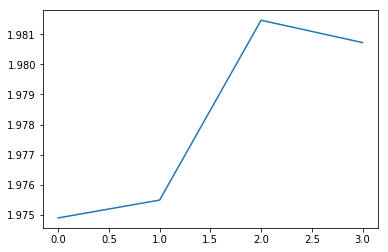

In [20]:
plt.plot(gendis.shapelets[0])

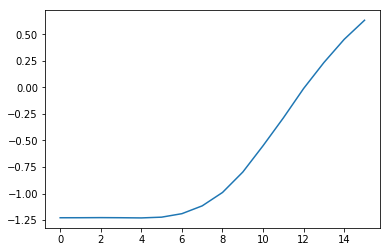

In [21]:
plt.plot(gendis.shapelets[1])

### Persistence of results

In [27]:
pd.DataFrame(distances_train).to_csv(f'{folder}/dist_matrix.csv', header=False, index=False)
pd.DataFrame(distances_train).describe().to_csv(f'{folder}/dist_matrix_stats.csv')